# Audio - Chapter 1

In [ ]:
import librosa
# import librosa.display
import matplotlib.pyplot as plt
import numpy as np

from datasets import load_dataset

/home/kurianbenoy/mambaforge/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
array, sampling_rate = librosa.load(librosa.ex("trumpet"))

In [ ]:
sampling_rate

22050

<librosa.display.AdaptiveWaveplot>

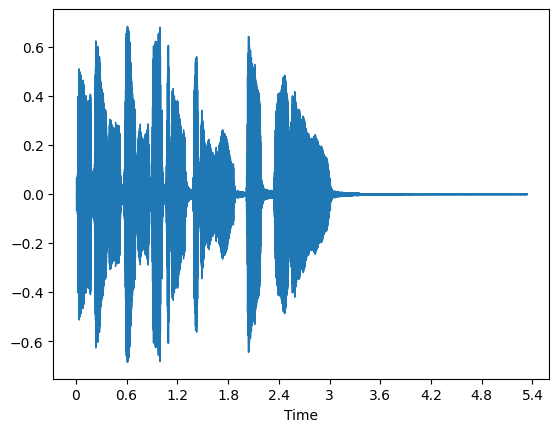

In [ ]:
librosa.display.waveshow(array, sr=sampling_rate)

<librosa.display.AdaptiveWaveplot>

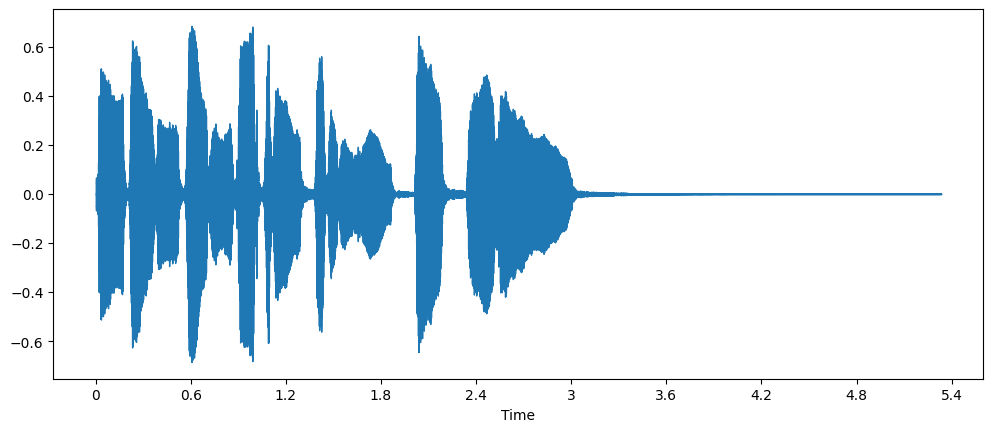

In [ ]:
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

## Malayalam Song

In [ ]:
array, sampling_rate = librosa.load(path="data/00b38e80-80b8-4f70-babf-566e848879fc.webm")

/tmp/ipykernel_426/891476538.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  array, sampling_rate = librosa.load(path="data/00b38e80-80b8-4f70-babf-566e848879fc.webm")
/home/kurianbenoy/mambaforge/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
array

array([ 2.5196169e-12,  2.2992250e-12, -6.5382346e-13, ...,
        7.8465561e-08, -8.1261959e-08,  8.1872386e-08], dtype=float32)

In [ ]:
array.shape

(104517,)

In [ ]:
sampling_rate

22050

<librosa.display.AdaptiveWaveplot>

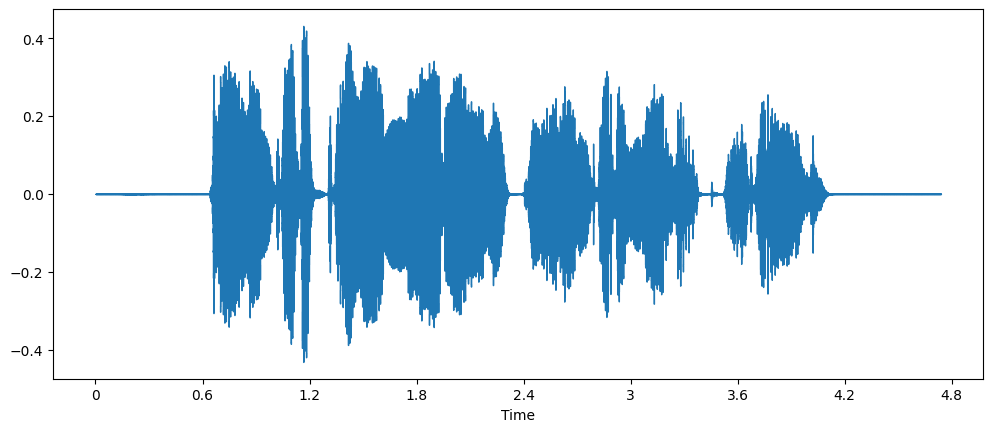

In [ ]:
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

In [ ]:
dft_input = array[:4096]

In [ ]:
# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

In [ ]:
# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

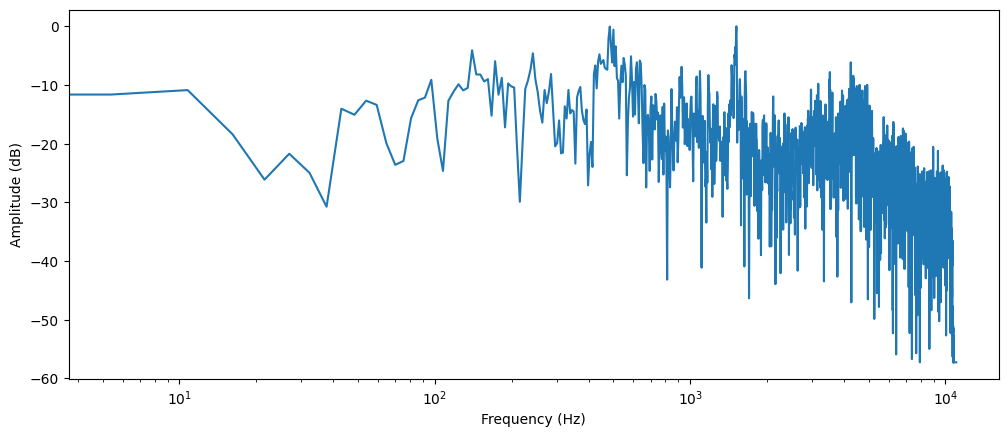

In [ ]:

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

## Librosa Quick start examples

In [ ]:
import librosa


# 1. Get the file path to an included audio example

filename = librosa.example('nutcracker')

In [ ]:
# 2. Load the audio as a waveform `y`

#    Store the sampling rate as `sr`

y, sr = librosa.load(filename)

In [ ]:
sr

22050

In [ ]:
y

array([ 2.2716861e-06,  5.3327212e-06, -7.2473290e-06, ...,
        1.1170751e-05,  1.2871884e-06,  5.4120619e-06], dtype=float32)

In [ ]:
# 3. Run the default beat tracker

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)


print('Estimated tempo: {:.2f} beats per minute'.format(tempo))


# 4. Convert the frame indices of beat events into timestamps

beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: 107.67 beats per minute


In [ ]:
beat_times

array([  1.18421769,   1.71827664,   2.32199546,   2.87927438,
         3.45977324,   4.01705215,   4.59755102,   5.13160998,
         5.7353288 ,   6.29260771,   6.84988662,   7.40716553,
         7.9876644 ,   8.54494331,   9.12544218,   9.65950113,
        10.21678005,  10.72761905,  11.28489796,  11.79573696,
        12.32979592,  12.86385488,  13.42113379,  13.95519274,
        14.4892517 ,  15.02331066,  15.55736961,  16.09142857,
        16.62548753,  17.15954649,  17.69360544,  18.25088435,
        18.80816327,  19.31900227,  19.87628118,  20.38712018,
        20.92117914,  21.4552381 ,  21.98929705,  22.52335601,
        23.05741497,  23.59147392,  24.12553288,  24.65959184,
        25.19365079,  25.72770975,  26.26176871,  26.81904762,
        27.35310658,  27.88716553,  28.44444444,  29.00172336,
        29.55900227,  30.11628118,  30.67356009,  31.20761905,
        31.78811791,  32.34539683,  32.85623583,  33.36707483,
        33.90113379,  34.43519274,  34.94603175,  35.45

## Loading an audio dataset

In [ ]:
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")

Dataset minds14 downloaded and prepared to /home/kurianbenoy/.cache/huggingface/datasets/PolyAI___minds14/en-AU/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


In [ ]:
example = minds[0]
example

{'path': '/home/kurianbenoy/.cache/huggingface/datasets/downloads/extracted/2db01fcd26b328e2a27d7044cbac7d3401a0a724dc49b68680b6b165f6afd51d/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/home/kurianbenoy/.cache/huggingface/datasets/downloads/extracted/2db01fcd26b328e2a27d7044cbac7d3401a0a724dc49b68680b6b165f6afd51d/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ], dtype=float32),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

<librosa.display.AdaptiveWaveplot>

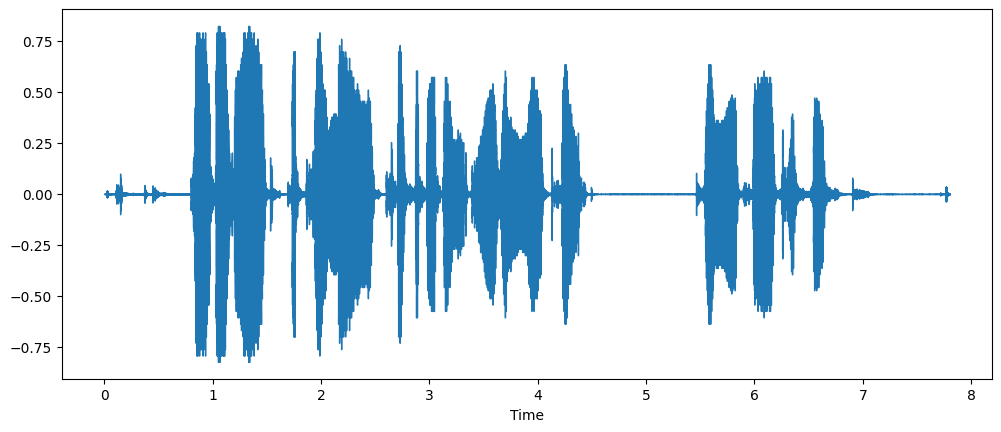

In [ ]:
array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

In [ ]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [ ]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})